In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [12]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [16]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [17]:
pd.to_datetime(df['Date'], dayfirst=True)

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

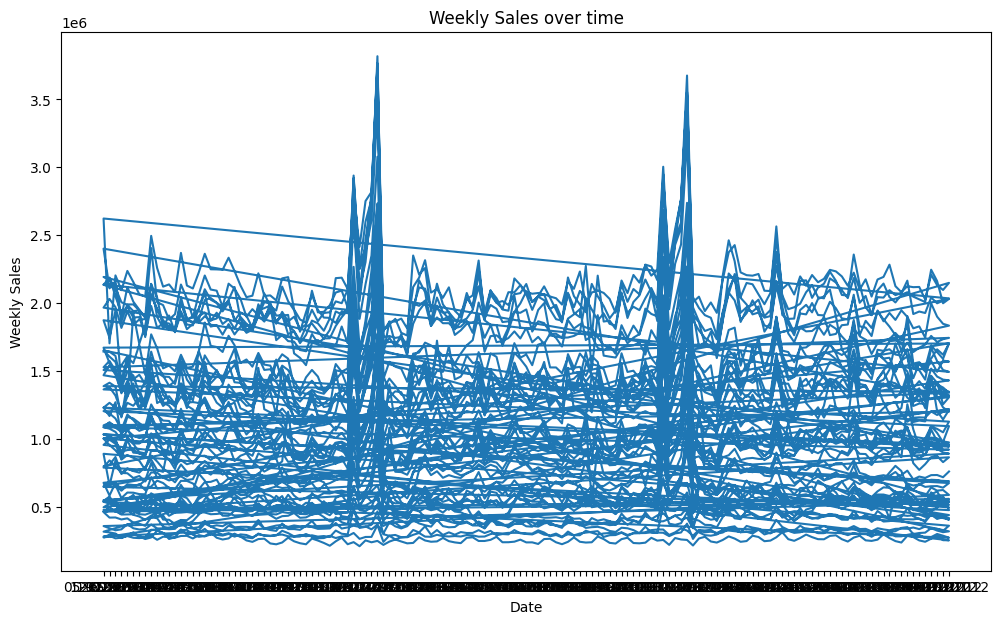

In [20]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title("Weekly Sales over time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

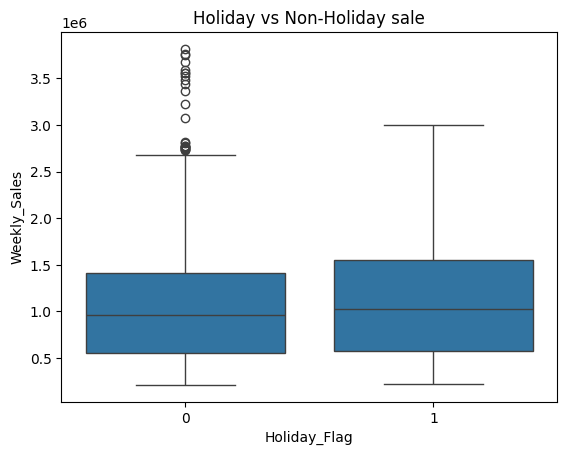

In [21]:
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday sale")
plt.show()

In [37]:
df['Year'] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.weekday

In [34]:
df[["Year","Month"]]

,Year,Month
0,2010,2
1,2010,2
2,2010,2
3,2010,2
4,2010,3
...,...,...
6430,2012,9
6431,2012,10
6432,2012,10
6433,2012,10


In [24]:
df['Date'].dtype

dtype('O')

In [27]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce',dayfirst="True")

In [28]:
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [30]:
df["Date"].isnull().any()

np.False_

In [38]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,4
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,4
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,4
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,4,4
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,4,4


In [42]:
df = df.drop(columns=["Date"])

In [43]:
X = df.drop('Weekly_Sales', axis=1)
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

MAE = mean_absolute_error(y_test, prediction)
RMSE = np.sqrt(mean_squared_error(y_test, prediction))

In [47]:
print(MAE)
print(RMSE)

432293.58773906616
521321.8139043535


In [48]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest MAE: 72229.67700054389
Random Forest RMSE: 139359.28533155192


In [50]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [MAE, mae_rf],
    'RMSE': [RMSE, rmse_rf]
})

results

,Model,MAE,RMSE
0,Linear Regression,432293.587739,521321.813904
1,Random Forest,72229.677001,139359.285332


In [ ]:
#Lower MAE = better average error

#Lower RMSE = better (penalizes big misses more)

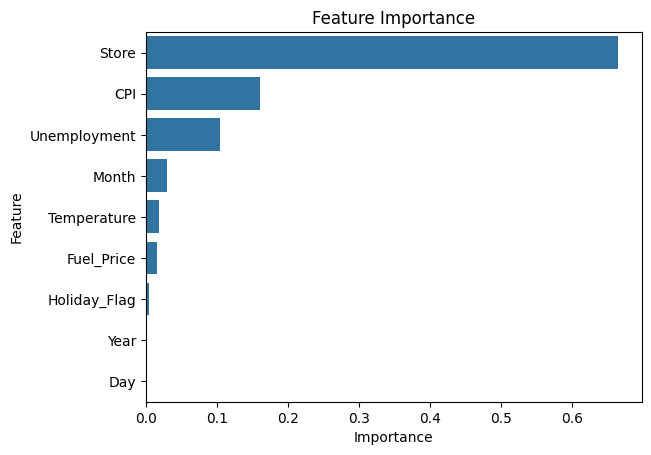

In [51]:
importances = rf.feature_importances_
features = X.columns

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()


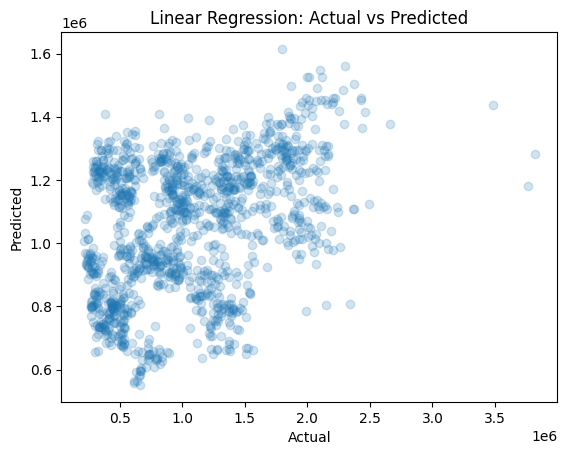

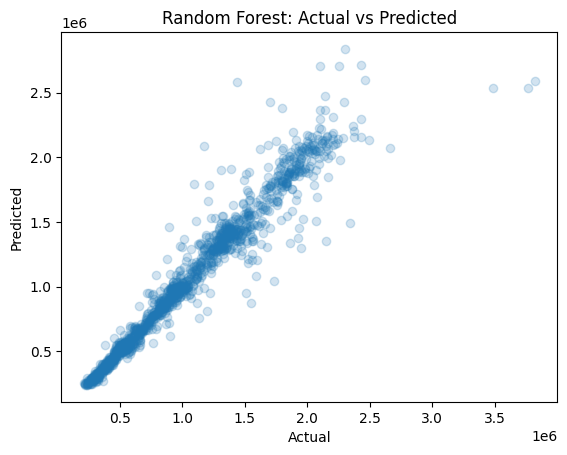

In [60]:
plt.scatter(y_test, prediction, alpha=0.2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

plt.scatter(y_test, y_pred_rf, alpha=0.2)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


Month and week are strong predictors of sales (seasonality)

Holidays significantly increase sales volume

Economic indicators have moderate influence

Random Forest improves prediction accuracy over baseline model